# Лабораторная работа № 3 на питоне

## Подготовка к работе

#### Если работаете не в Google Collab, то нужно подгрузить следующие библиотеки:


In [1]:
# pip install openpyxl
# pip install seaborn
# pip install xlrd

#### Импортирование библиотек

In [2]:
import pandas as pd #специальные структуры данных и операции для манипулирования числовыми таблицами
import numpy as np #добавляет поддержку больших многомерных массивов и матриц
import matplotlib.pyplot as plt #библиотека для построения научных графиков
import scipy.stats as sts #все функции статистики
import seaborn as sns #библиотека для создания статистических графиков на Python
import numpy.linalg as nl #реализует операции линейной алгебры
%matplotlib inline 
# %matplotlib inline нужен для визуализации статических графиков matplotlib в Jupyter Notebook

## Перечисление признаков
### Названия переменных должны быть такими же, как в Excel !!!

In [3]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'] #должны быть с таким же названием как в экселе
f_len = len(features) #измеряется длина списка - количество признаков

## Загрузка Excel-файла
### Подставь свои значения в метод read_excel - имя эксель-файла и название нужного листа !!!

In [4]:
# подставь свои значения! - имя эксель-файла и названия листа
data = pd.read_excel("ЛР 3.xlsx", engine='openpyxl', sheet_name="Данные", index_col=0).loc[:, features] 
data.columns=features #задаются названия колонок 
X = data.values # таблица всех значений
data.head() #просмотр первых n строк фрейма данных pandas

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Регион,,,,,,,,,
Алтайский край,9.212794,4.393977,23864,4.888962,4.896903,3.735763,16.4,7.702695,1.184
Амурская область,9.620554,5.608319,35499,5.208003,6.866272,3.885274,16.1,17.567293,6.098
Архангельская область,8.156995,5.349659,36779,4.754055,2.245869,2.968140,14.6,17.113520,12.356
Астраханская область,8.742148,6.267783,25199,5.094280,1.617232,2.350040,13.6,11.270083,3.494
Белгородская область,6.998984,4.071958,32841,5.422743,2.221900,1.339021,15.5,10.946124,7.374


### Нормировка

In [5]:
data = (data - data.mean(axis=0))/data.std()
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Регион,,,,,,,,,
Алтайский край,0.550909,-0.456354,-0.625030,-0.354471,1.077778,1.051521,0.610943,-0.294640,-0.816480
Амурская область,0.864949,0.767179,0.199023,0.241207,2.142743,1.169850,0.516397,0.143576,0.086356
Архангельская область,-0.262225,0.506562,0.289679,-0.606353,-0.355807,0.443996,0.043666,0.123418,1.236121
Астраханская область,0.188435,1.431635,-0.530478,0.028876,-0.695752,-0.045192,-0.271488,-0.136165,-0.392070
Белгородская область,-1.154079,-0.780811,0.010769,0.642145,-0.368769,-0.845349,0.327305,-0.150557,0.320792
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,-1.757579,-1.683297,-0.573186,-1.426533,-1.534643,-1.826316,-2.603629,-0.588789,-0.895482
Чувашская Республика,0.092687,0.255755,-0.816896,0.019112,-0.306261,-0.503082,0.295789,-0.544475,-0.559078
Чукотский автономный округ,3.225378,2.428669,4.026564,2.099932,2.730534,1.966008,-1.279981,0.891237,3.152764


## Нахождение корреляционной матрицы

In [8]:
print("Корреляционная матрица:")
correlation = data.corr() #корреляционная матрица
correlation

Корреляционная матрица:


,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,0.337020,0.255880,0.296896,0.577569,0.486704,0.219689,0.030272,0.273646
X2,0.337020,1.000000,0.502469,0.527726,0.221108,0.072294,-0.161744,0.112938,0.306288
X3,0.255880,0.502469,1.000000,0.391519,0.138415,-0.028247,-0.332628,0.486666,0.682649
X4,0.296896,0.527726,0.391519,1.000000,0.124912,-0.008186,0.212826,0.042594,0.253661
X5,0.577569,0.221108,0.138415,0.124912,1.000000,0.767666,0.019947,0.249774,0.408598
X6,0.486704,0.072294,-0.028247,-0.008186,0.767666,1.000000,0.067901,0.205931,0.297715
X7,0.219689,-0.161744,-0.332628,0.212826,0.019947,0.067901,1.000000,-0.307145,-0.324024
X8,0.030272,0.112938,0.486666,0.042594,0.249774,0.205931,-0.307145,1.000000,0.769659
X9,0.273646,0.306288,0.682649,0.253661,0.408598,0.297715,-0.324024,0.769659,1.000000


#### Корреляционная матрица в виде тепловой карты

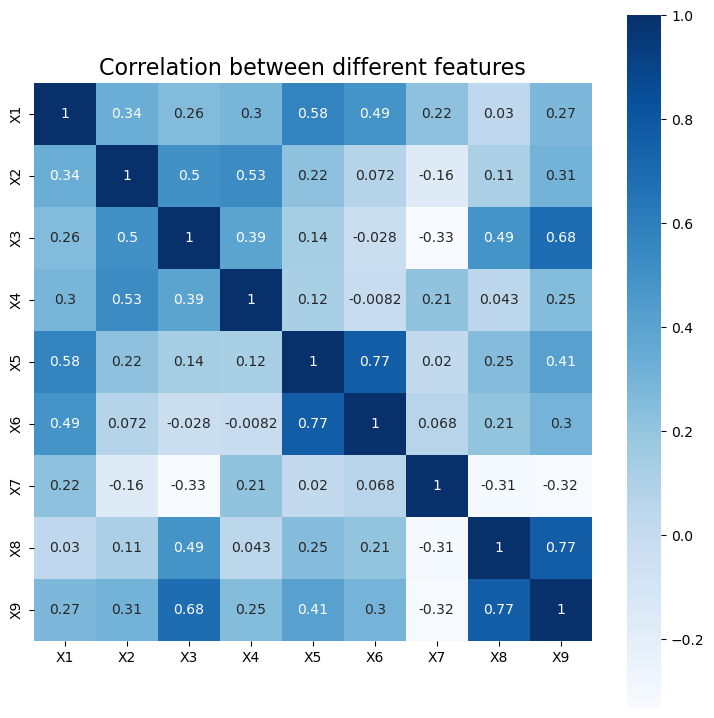

In [9]:
plt.figure(figsize=(9,9)) #создали область Figure
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Blues')
#heatmap - тепловая карта; vmax - значения для привязки цветовой карты
plt.title('Correlation between different features',fontsize=16) #заголовок тепловой карты
plt.show()

## Гипотеза о незначимости корреляционной матрицы

### Расчет оценок собственных чисел корреляционной матрицы

In [13]:
#проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation) #вычисляет собственные числа (значения) и собственные векторы корреляционной матрицы
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i])) #добавляет в конец списка значения по одиночке

couple_lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
#key (необязательный параметр): если указать ключ, то сортировка будет выполнена по функции этого ключа
#reverse: по умолчанию сортировка выполняется по возрастанию. Указано reverse=True, т.к. сортируем по убыванию
eigenvalues_sorted = sorted(eigenvalues, reverse=True)
print("Оценки собственных чисел корреляционной матрицы:")
eigenvalues_sorted
# couple_lst

Оценки собственных чисел корреляционной матрицы:


[3.2938899639480437,
 1.9295287832399866,
 1.545141468397989,
 0.7968544752764853,
 0.4950025198508741,
 0.33645128431131976,
 0.24573931414052996,
 0.2096454551650036,
 0.14774673566976843]

### Проверка гипотезы

In [14]:
import math #math предоставляет доступ к некоторым популярным математическим функциям и константам

def chi_2(n, k, R):
    return -(n-1/6*(2*k+5))*math.log(np.linalg.det(R)) 
#формула статистики Хи^2; math.log (x) используется для вычисления натурального логарифмического значения
#np.linalg.det(R) вычисление определителя заданного квадратного массива k – число факторов; n – объем выборки
chi2_z = chi_2(data.shape[0], data.shape[1], correlation) # .shape - это кортеж размеров массива
p_value =sts.chi2.sf(chi2_z, data.shape[1]* (data.shape[1]-1) / 2) #значение p-value
print("Статистика критерия: ", chi2_z)
print("Достигаемый уровень значимости (p-value): ", p_value)
if p_value > 0.05: 
    print("Гипотеза принимается, матрица парных коэффициентов корреляции незначима.")
else:
    print('Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.')

Статистика критерия:  365.2112100565154
Достигаемый уровень значимости (p-value):  4.287835179482197e-56
Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.


## Построение доверительных интервалов

In [15]:
#доверительные интервалы
def eigenval_left(l, n):
    return l / (1 + sts.norm.ppf(0.975) * math.sqrt(2/(n-1))) #sts.norm.ppf квантиль

def eigenval_right(l, n):
    return  l / (1 - sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

conf_interval = np.empty((f_len, 3))
#f_len - кол-во признаков; возвращает массив заданной размерности, но без инициализации его значений
for i in range(conf_interval.shape[0]):
    conf_interval[i, 0] = eigenval_left(eigenvalues_sorted[i], data.shape[0])
    conf_interval[i, 1] = eigenvalues_sorted[i]
    conf_interval[i, 2] = eigenval_right(eigenvalues_sorted[i], data.shape[0])
    #заполнение левой и правой границ собственных значений 

print('Доверительные интервалы для собственных значений корреляционной матрицы:')
conf_interval_df = pd.DataFrame(conf_interval, columns=["left_border", "eig", "right_border"])
conf_interval_df

Доверительные интервалы для собственных значений корреляционной матрицы:


,left_border,eig,right_border
0,2.521938,3.293890,4.746889
1,1.477327,1.929529,2.780681
2,1.183024,1.545141,2.226733
3,0.610105,0.796854,1.148362
4,0.378994,0.495003,0.713358
5,0.257601,0.336451,0.484866
6,0.188148,0.245739,0.354140
7,0.160513,0.209645,0.302124
8,0.113121,0.147747,0.212921


## Проверка гипотезы о кратности собственных чисел
### Если вам нужно проверять, то введите нужное r - число кратных корней !!!

In [16]:
#Проверка гипотезы о кратности собственных чисел

r = 2 #число кратных корней
N = X.shape[0] #число наблюдений
z = (N - 1) * sum(np.log(eigenvalues_sorted[:2])) + (N - 1) * r * np.log(1 / r * sum(eigenvalues_sorted[:2]))
n = r * (r + 1) / 2 - 1 #число степеней свободы
p_val = 2 * min(sts.chi2.cdf(z, n), sts.chi2.sf(z, n))
print("Достигаемый уровень значимости: ",p_val)
if p_val > 0.05:
    print(f"Гипотеза о кратности {r} собственных чисел принимается")
else:
    print(f"Гипотеза о кратности {r} собственных чисел отвергается")

Достигаемый уровень значимости:  1.5262237011102362e-67
Гипотеза о кратности 2 собственных чисел отвергается


## Оценка уровня информативности

In [17]:
#оценка уровня информативности
pc = 0
lmbd = 0

for i in range(4):
    lmbd = lmbd + eigenvalues_sorted[i]
    I = lmbd * 100 / f_len
    if (I > 55) & (pc == 0):
      pc = i+1
    #значения собственных чисел складываются, умножаются на 100, делятся на кол-во объектов
    print(f"Оценка информативности для {i + 1} главных компонент:")
    print('I(x) = {:.3f}%'.format(I))
print(f"Будет достаточно {pc} главных компонент, т.к. уровень информативности больше 55%")

Оценка информативности для 1 главных компонент:
I(x) = 36.599%
Оценка информативности для 2 главных компонент:
I(x) = 58.038%
Оценка информативности для 3 главных компонент:
I(x) = 75.206%
Оценка информативности для 4 главных компонент:
I(x) = 84.060%
Будет достаточно 2 главных компонент, т.к. уровень информативности больше 55%


## Критерий Кайзера

In [18]:
print("Критерий Кайзера: ", len(eigenvalues[eigenvalues > 1]))
#вычисляется длина массива для первых трех собсвенных чисел, поскольку все остальные <1
if len(eigenvalues[eigenvalues > 1]) >= pc:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")
pc = len(eigenvalues[eigenvalues > 1]) - 1 #количество главных компонент выбирается по критерию Кайзера для дальнейшей работы

Критерий Кайзера:  3
Гипотеза о достаточности 2 главных компонент принимается


In [19]:
pc

2

## График собственных чисел

#### Подсчет матрицы дисперсий

In [20]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues)) #массив заданной размерности, но без инициализации его значений
eigenvalues_sum = eigenvalues.sum() #сумма собственных чисел

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum 

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted) #функция, значение собственного числа делиться на всю сумму
df = pd.DataFrame(
    zip( #создает итератор, который объединяет элементы из нескольких источников данных
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(100*x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share, %"]
)

#### Изображаем на графике собственных чисел

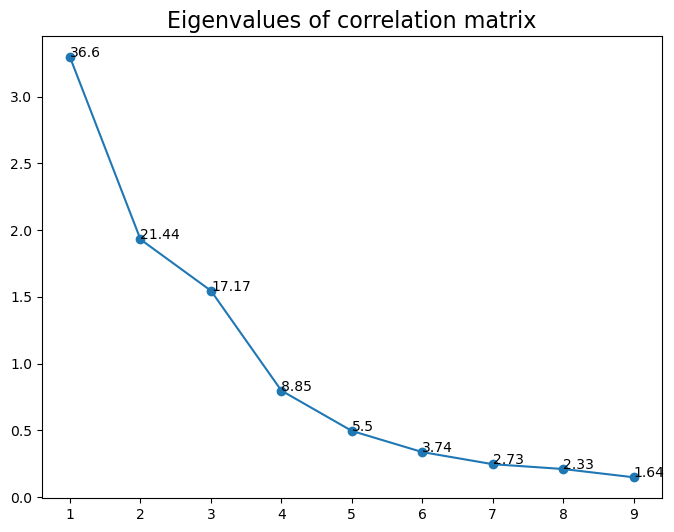

In [21]:
plt.figure(figsize=(8, 6)) #создали область Figure
plt.title('Eigenvalues of correlation matrix',fontsize=16)
plt.plot(df['number'], df['eig'], marker='o')
#plot рисует точки, соединенные линиями, df - датафрейм из прошлого блока кода
ax = plt.gca()
#используется для получения текущего экземпляра Axes на текущей фигуре, axes- непосредственно область построения
df.apply(lambda x: ax.annotate(x['variance_share, %'], (x['number'], x['eig'])), axis=1)
#применение функции к каждой строке, annotate добавляет аннотацию на координатную плоскость в координаты (x, y)
plt.show()

## Вклады главных компонент в суммарную дисперсию исходных признаков

In [22]:
print("Вклады главных компонент в суммарную дисперсию исходных признаков")
result = pd.concat([df, np.cumsum(df[['eig', 'variance_share, %']])], axis=1) 
#concat соединяет пересекающиеся данные для заполнения недостающих значений в структуре, 
#cumsum () возвращает кумулятивную (накапливаемую) сумму элементов массива
result.columns = list(df.columns) + ['cum_eig', 'cum_variance_share, %']
result

Вклады главных компонент в суммарную дисперсию исходных признаков


,eig,number,"variance_share, %",cum_eig,"cum_variance_share, %"
0,3.293890,1,36.60,3.293890,36.60
1,1.929529,2,21.44,5.223419,58.04
2,1.545141,3,17.17,6.768560,75.21
3,0.796854,4,8.85,7.565415,84.06
4,0.495003,5,5.50,8.060417,89.56
5,0.336451,6,3.74,8.396868,93.30
6,0.245739,7,2.73,8.642608,96.03
7,0.209645,8,2.33,8.852253,98.36
8,0.147747,9,1.64,9.000000,100.00


## Матрица главных компонент U

In [23]:
# Коэффициенты линейного преобразования центрировано-нормированных исходных признаков
u = np.empty((f_len, f_len))  #матрица U главных компонент
for i in range(f_len):
    u[i] = couple_lst[i][1]  #достаем главные компоненты
    #print(u[i])
    #u[i] - собственные вектора корреляционный матрицы
# Создадим фрейм
u = pd.DataFrame(
    data=u.T,
    columns=['Factor_' + str(i+1) for i in range(f_len)],
    index=features
)
u

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9
X1,0.324576,0.413852,0.144908,0.088667,0.675445,0.004844,0.477321,-0.083584,-0.058696
X2,0.324963,-0.070188,0.444850,0.457969,-0.249781,-0.638348,-0.007373,-0.002781,0.109107
X3,0.399260,-0.339217,0.180739,-0.030661,0.396076,0.145386,-0.642361,-0.094015,-0.304033
X4,0.249874,0.030706,0.597380,-0.236197,-0.427506,0.514320,0.239238,-0.064323,-0.123733
X5,0.365190,0.404923,-0.233056,0.145987,-0.182158,0.132409,-0.188000,0.724590,-0.126322
X6,0.283343,0.454375,-0.341029,0.104975,-0.290484,0.043545,-0.215024,-0.671951,-0.043699
X7,-0.127260,0.452620,0.286609,-0.659639,0.047337,-0.388376,-0.313488,0.052935,0.086704
X8,0.347921,-0.291668,-0.330828,-0.435392,-0.144252,-0.361773,0.348816,0.007263,-0.470589
X9,0.465095,-0.217794,-0.171387,-0.262015,0.033676,0.075375,0.026845,0.025009,0.793767


## Полная матрица нагрузок

In [24]:
# полная матрица нагрузок
sqrt_l = np.eye(f_len)
for i in range(f_len):
    sqrt_l[i][i] = math.sqrt(eigenvalues_sorted[i])
A = np.dot(u, sqrt_l)
A = pd.DataFrame(
    data=A,
    columns=['Factor_' + str(i+1) for i in range(f_len)],
    index=features
)
A

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9
X1,0.589075,0.574872,0.180126,0.079150,0.475219,0.002810,0.236618,-0.038271,-0.022562
X2,0.589778,-0.097496,0.552965,0.408814,-0.175737,-0.370270,-0.003655,-0.001273,0.041938
X3,0.724620,-0.471198,0.224665,-0.027370,0.278665,0.084330,-0.318432,-0.043047,-0.116864
X4,0.453498,0.042652,0.742565,-0.210845,-0.300778,0.298329,0.118595,-0.029452,-0.047560
X5,0.662786,0.562468,-0.289698,0.130318,-0.128160,0.076803,-0.093196,0.331769,-0.048556
X6,0.514242,0.631161,-0.423911,0.093708,-0.204374,0.025258,-0.106592,-0.307666,-0.016797
X7,-0.230965,0.628724,0.356266,-0.588838,0.033304,-0.225275,-0.155403,0.024238,0.033327
X8,0.631444,-0.405149,-0.411232,-0.388660,-0.101490,-0.209845,0.172915,0.003326,-0.180884
X9,0.844104,-0.302532,-0.213040,-0.233892,0.023693,0.043721,0.013308,0.011451,0.305107


### Матрица нагрузок A

In [25]:
#возьмем только первые главные компоненты
u1 = u.iloc[:, :pc]

# рассчитаем первые pc для матрицы назгрузок
A1 = A.iloc[:, :pc]
A1

,Factor_1,Factor_2
X1,0.589075,0.574872
X2,0.589778,-0.097496
X3,0.724620,-0.471198
X4,0.453498,0.042652
X5,0.662786,0.562468
X6,0.514242,0.631161
X7,-0.230965,0.628724
X8,0.631444,-0.405149
X9,0.844104,-0.302532


## Матрица индивидуальных значений главных компонент

In [26]:
# Матрица индивидуальных значений главных компонент
# @ - оператор перемноженния матриц
F = (np.linalg.inv(A.T @ A) @ A.T @ data.T).T 
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F.columns = ['Factor_' + str(i + 1) for i in range(pc)]
F[:85]

,Factor_1,Factor_2
Регион,,
Алтайский край,-0.097016,1.379084
Амурская область,0.996280,1.307527
Архангельская область,0.359142,-0.351850
Астраханская область,-0.077279,-0.102011
Белгородская область,-0.431204,-0.588873
...,...,...
Чеченская Республика,-1.691926,-1.959245
Чувашская Республика,-0.523262,0.259129
Чукотский автономный округ,4.111501,0.241878


### Сравнить эту матрицу с полученной в STATISTICA
#### Если есть столбцы с обратными знаками, то раскомментировать соответствующую строчку

In [29]:
#раскомментировать, если у вас компоненты с обратными знаками
F['Factor_1']=F['Factor_1']*(-1)
F['Factor_2']=F['Factor_2']*(-1)
# F['Factor_3']=F['Factor_3']*(-1)
# F['Factor_4']=F['Factor_4']*(-1)
F

,Factor_1,Factor_2
Регион,,
Алтайский край,0.097016,1.379084
Амурская область,-0.996280,1.307527
Архангельская область,-0.359142,-0.351850
Астраханская область,0.077279,-0.102011
Белгородская область,0.431204,-0.588873
...,...,...
Чеченская Республика,1.691926,-1.959245
Чувашская Республика,0.523262,0.259129
Чукотский автономный округ,-4.111501,0.241878


## Загружаем распределение по классам для метода Уорда и К-средних
### Нужно назвать столбцы в Excel как ward_old и kmeans_old соответственно !!!
### Изменить название екселевского файла в методе read_excel !!!

In [30]:
#загружаем метки классов, полученные на 1 л/р для метода Уорда и К-средних

classes = pd.read_excel('Уорда+k средних.xlsx', engine='openpyxl')
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

,Factor_1,Factor_2,ward_old,kmeans_old
Регион,,,,
Алтайский край,0.097016,1.379084,3,6
Амурская область,-0.996280,1.307527,3,6
Архангельская область,-0.359142,-0.351850,4,1
Астраханская область,0.077279,-0.102011,4,1
Белгородская область,0.431204,-0.588873,2,1
...,...,...,...,...
Чеченская Республика,1.691926,-1.959245,5,2
Чувашская Республика,0.523262,0.259129,4,1
Чукотский автономный округ,-4.111501,0.241878,6,5


### Кластеризируем полученный результат и строим дендрограмму по методу Уорда

In [31]:
#кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

Text(0.5, 1.0, 'ward method')

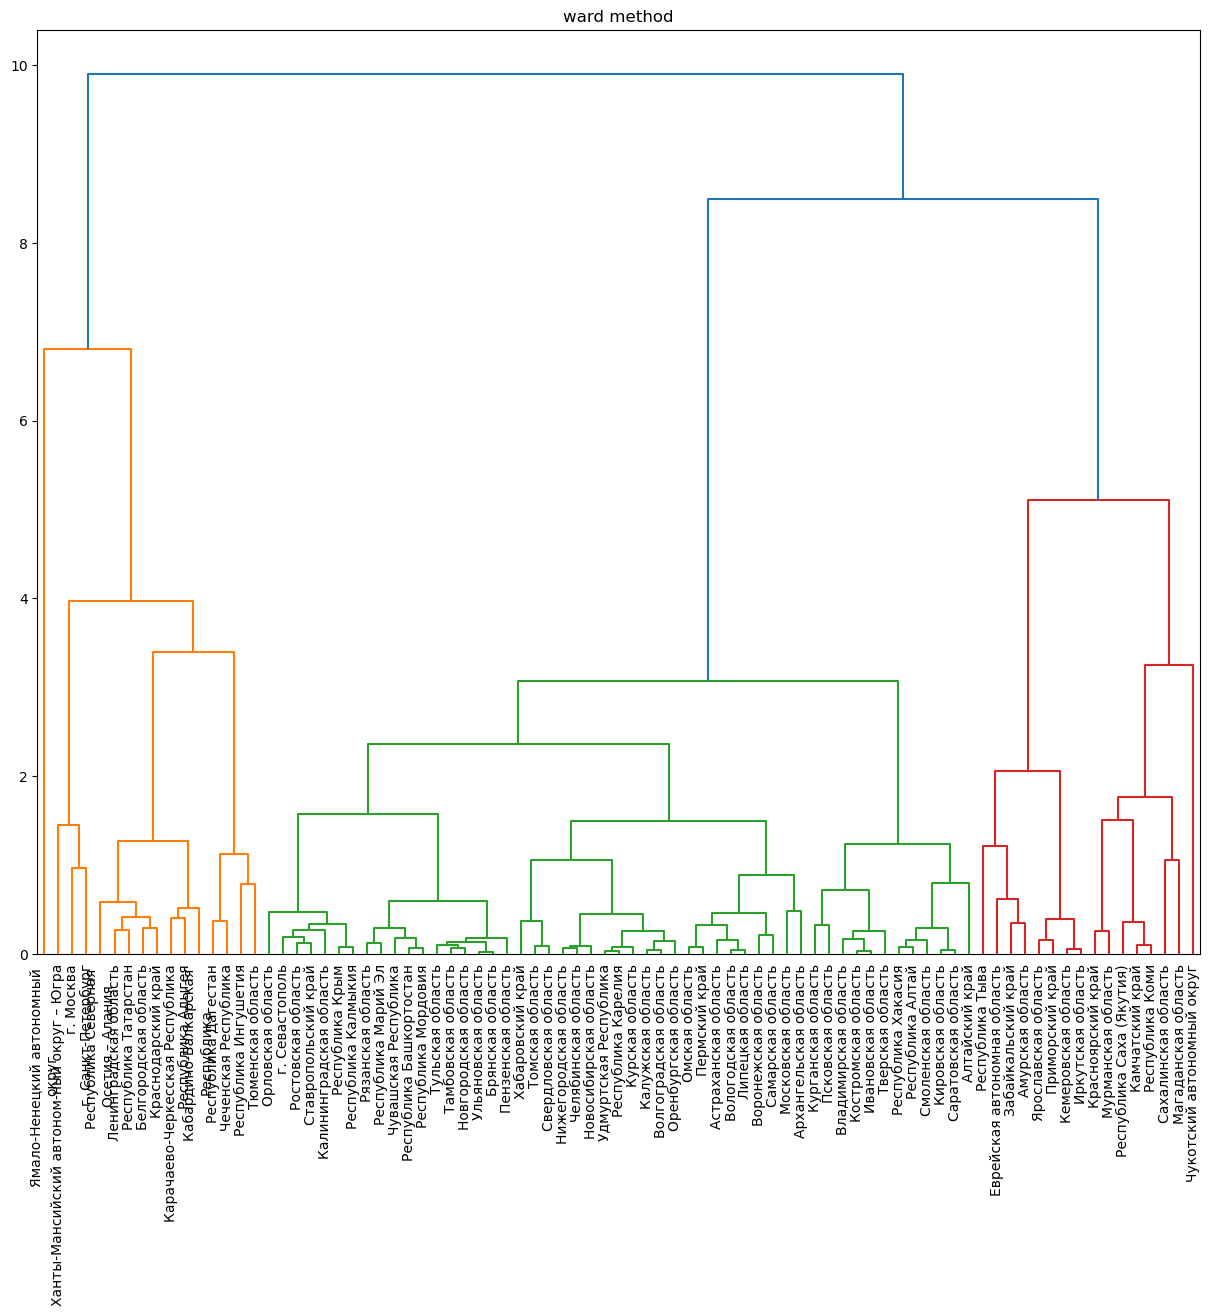

In [32]:
Z = hierarchy.linkage(F.iloc[:, :pc], method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) #задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

  #Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

### Посчитать количество классов по гистограмме и записать это число в переменную n_clusters

In [35]:
n_clusters = 6 #изменить это значение!
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(F.iloc[:, :pc])

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(F.iloc[:, :pc])
# т.к. в питоне отсчет с нуля, то +1
F['ward_new'] = ward.labels_+1
F['kmeans_new'] = kmeans.labels_+1
F

,Factor_1,Factor_2,ward_old,kmeans_old,ward_new,kmeans_new
Регион,,,,,,
Алтайский край,0.097016,1.379084,3,6,3,1
Амурская область,-0.996280,1.307527,3,6,5,1
Архангельская область,-0.359142,-0.351850,4,1,3,6
Астраханская область,0.077279,-0.102011,4,1,3,6
Белгородская область,0.431204,-0.588873,2,1,1,2
...,...,...,...,...,...,...
Чеченская Республика,1.691926,-1.959245,5,2,1,4
Чувашская Республика,0.523262,0.259129,4,1,3,6
Чукотский автономный округ,-4.111501,0.241878,6,5,2,3


### Построение двумерных графиков по методам Уорда и k-средних (после МГК для переменных Factor 1 и Factor 2)

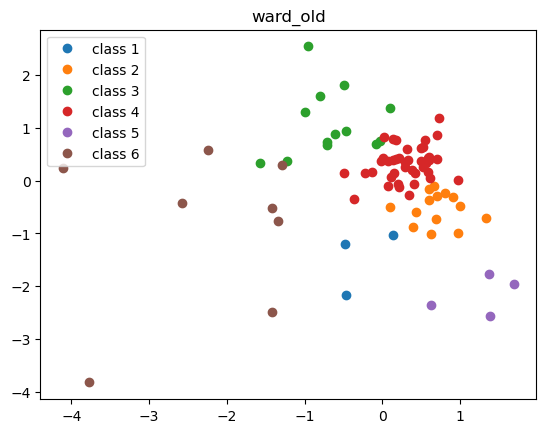

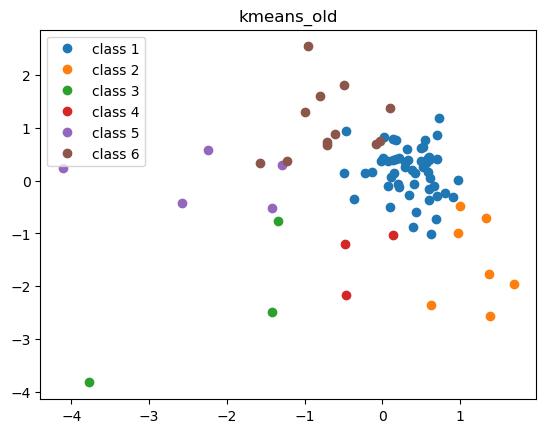

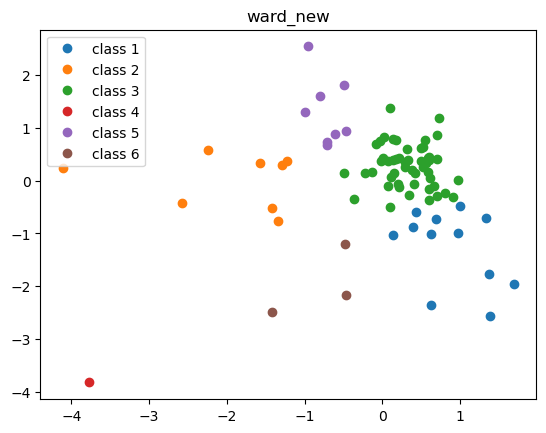

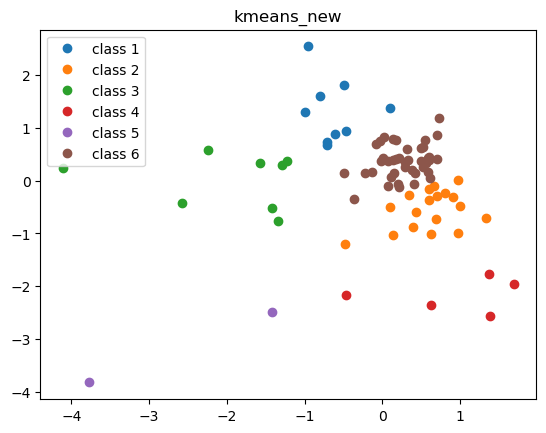

In [36]:
#построение графика по factor 1 и factor 2

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    n_clusters = len(F[method].unique())
    i=1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
        i += 1
    plt.legend()
    plt.show()


### Построение двумерных графиков по методам Уорда и k-средних (после МГК для переменных Factor 1 и Factor 3)
#### ТОЛЬКО ДЛЯ 3 ГЛАВНЫХ КОМПОНЕНТ !!!

AttributeError: 'DataFrame' object has no attribute 'Factor_3'

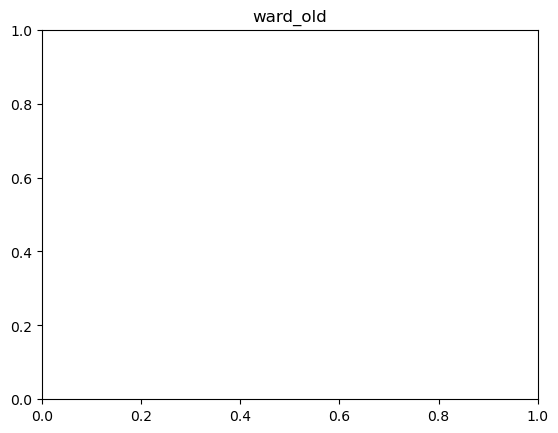

In [37]:
#построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    n_clusters = len(F[method].unique())
    i=1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_3, 'o', label=f'class {i}')
        i += 1
    plt.legend()
    plt.show()


### Построение трехмерного графика по методам Уорда и k-средних
#### ТОЛЬКО ДЛЯ 3 ГЛАВНЫХ КОМПОНЕНТ !!!

In [ ]:
#трёхмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    n_clusters = len(F[method].unique())
    i = 1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}') 
        i += 1
    plt.legend()
    plt.show()

# label=f'class {i}'

## Выгрузка полученных результатов в екселевский файл

In [38]:
#выгрузка в файл
F.to_excel('Lab3_python.xlsx')